In [216]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

video_path = os.path.join('/kaggle/input/heart-attack-video/', 'Heart_attack_explanation.mp4')
ipd.Video(video_path, width=700, embed=True)

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')
attributes = data.columns
print(attributes)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


### Data Understanding
The dataset consists of 8763 individuals data. There are 14 columns in the dataset, which are described below:

**Patient ID** - Unique identifier for each patient<br>
No relationship with heart attack risk;

**Age** - Age of the patient<br>
Higher age is often associated with an increased risk of heart attack.

**Sex** - Sex of the patient (Male/Female)<br>
Some studies show no relationship between sex and risk of heart attack, while others claim that males have a higher risk than females.

**Cholesterol** - Cholesterol levels of the patient<br>
High cholesterol is a risk factor for heart attacks.

**Blood Pressure** - Blood pressure of the patient (systolic/diastolic)<br>
High blood pressure is a risk factor for heart attacks.

**Heart Rate** - Heart rate of the patient<br>
Abnormal heart rates can indicate heart problems.

**Diabetes** - Whether the patient has diabetes (Yes/No)<br>
Diabetes is a significant risk factor for heart attacks.

**Family History** - Family history of heart-related problems (1: Yes, 0: No)<br>
Family history can indicate genetic risk factors.

**Smoking** - Smoking status of the patient (1: Smoker, 0: Non-smoker)<br>
Smoking is a known risk factor for heart attacks.

**Obesity** - Obesity status of the patient (1: Obese, 0: Not obese)<br>
Obesity is a risk factor for heart attacks.

**Alcohol Consumption** - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)<br>
Excessive alcohol can increase the risk.

**Exercise Hours Per Week** - Number of exercise hours per week<br>
Regular exercise can reduce the risk.

**Diet** - Dietary habits of the patient (Healthy/Average/Unhealthy)<br>
Diet can impact heart health.

**Previous Heart Problems** - Previous heart problems of the patient (1: Yes, 0: No)<br>
A history of heart problems can indicate increased risk.

**Medication Use** - Medication usage by the patient (1: Yes, 0: No)<br>
Medications may affect heart health.

**Stress Level** - Stress level reported by the patient (1-10)<br>
High stress levels can be a risk factor.

**Sedentary Hours Per Day** - Hours of sedentary activity per day<br>
Sedentary lifestyle can increase the risk.

**Income** - Income level of the patient<br>
Income may indirectly affect lifestyle choices that impact risk.

**BMI** - Body Mass Index (BMI) of the patient<br>
Higher BMI can increase heart attack risk.

**Triglycerides** - Triglyceride levels of the patient<br>
High triglyceride levels are a risk factor.

**Physical Activity Days Per Week** - Days of physical activity per week<br>
Regular physical activity can reduce risk.

**Sleep Hours Per Day** - Hours of sleep per day<br>
Inadequate or excessive sleep can affect heart health.

**Country** - Country of the patient<br>
Country of residence may influence lifestyle and healthcare access.

**Continent** - Continent where the patient resides<br>
Continent may reflect regional health trends.

**Hemisphere** - Hemisphere where the patient resides<br>
Hemisphere may also reflect regional health trends.

**Heart Attack Risk** - Presence of heart attack risk (1: Yes, 0: No)<br>
The target variable indicating the presence or absence of heart attack risk.

### Data Exploration
#### All columns

In [217]:
print(data.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [218]:
total_rows = data.shape[0]
print("Total Number of Rows:", total_rows)

Total Number of Rows: 8763


In [219]:
#Missing values
missing_values = data.isnull().sum()
print(missing_values)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


**There are no missing values in any of the attributes. So there are no lines to delete or fill in.**

In [220]:
# Duplicated values
duplicates=data.duplicated()
duplicated_rows=data[data.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Patient ID, Age, Sex, Cholesterol, Blood Pressure, Heart Rate, Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Exercise Hours Per Week, Diet, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Country, Continent, Hemisphere, Heart Attack Risk]
Index: []

[0 rows x 26 columns]


#### ID column
##### Type and senseless values

In [221]:
print(data['Patient ID'].dtype)
# Check if all identifiers are unique
print(len(data) - len(data['Patient ID'].unique()))

object
0


**All the ids are unique so we don't have duplicated users.<br>
This attribute does not provide us with any information for the rest of the project, so we are going to delete it.**

In [222]:
data.drop(columns=['Patient ID'], inplace=True)

#### Age column
##### Type

In [223]:
print(data['Age'].dtype)

int64


**Age has a numerical type which is what we want.**
##### Senseless values and Repartition

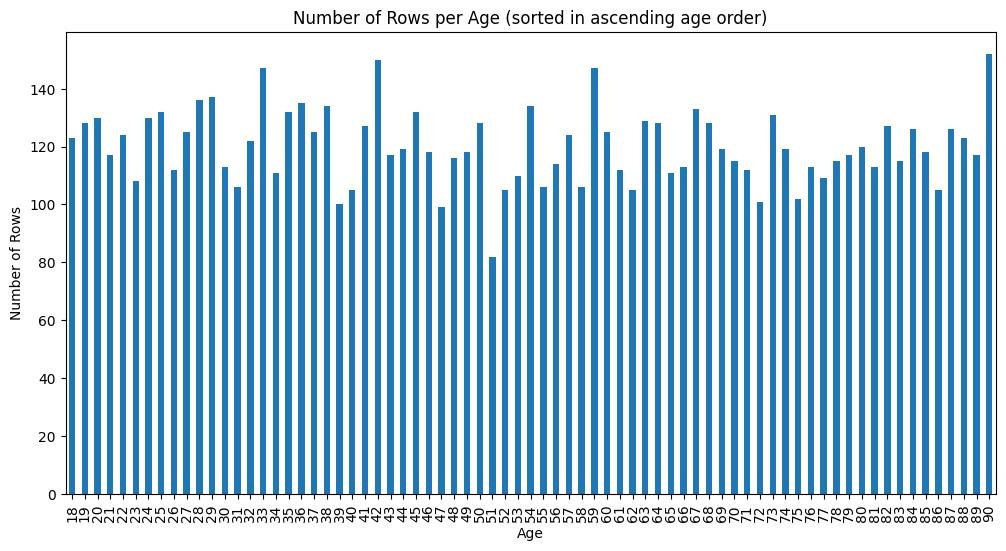

In [224]:
age_counts = data['Age'].value_counts()
age_counts = age_counts.sort_index()
plt.figure(figsize=(12, 6))
age_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Age (sorted in ascending age order)')
plt.show()

**We can note that the age column has no senseless values, since these are between 18 and 90 years old.**

#### Sex column
##### Type ans senseless values

In [225]:
print(data['Sex'].dtype)
sex = data['Sex'].unique()
print(sex)

object
['Male' 'Female']


**We can note that the continent column has no senseless values, since these are 6 correct values**

In [226]:
#make Sex numerical
# Create an empty dictionary to store the mapping
sex_mapping = {}

# Iterate over unique sexes and assign numerical values from 0 to 1
for i in range(len(sex)):
    sex_mapping[sex[i]] = i

# Map the 'Sex' column using the created mapping
data['Sex'] = data['Sex'].map(sex_mapping)

##### Repartition

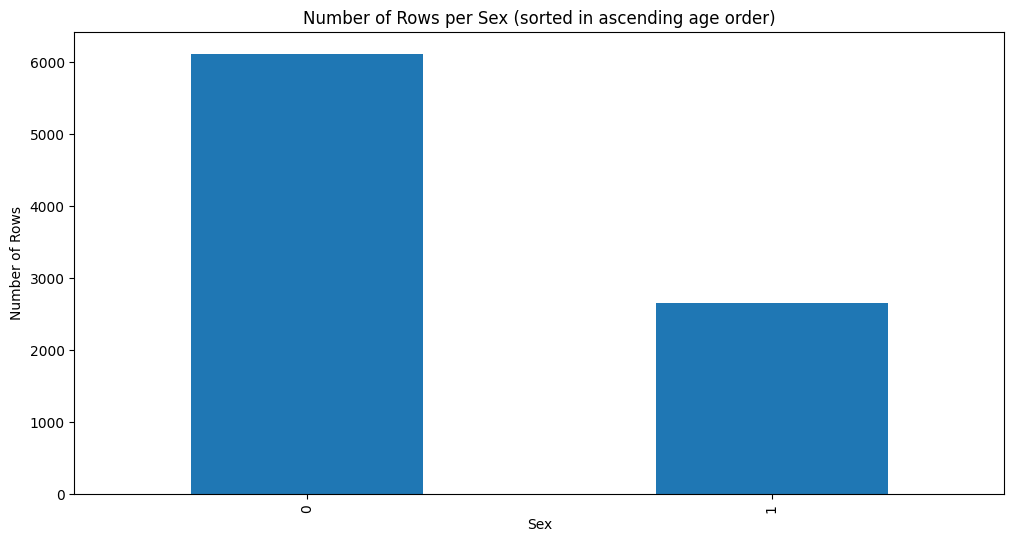

In [227]:
sex_counts = data['Sex'].value_counts()
sex_counts = sex_counts.sort_index()
plt.figure(figsize=(12, 6))
sex_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Sex (sorted in ascending age order)')
plt.show()

#### Cholesterol column

#### Blood Pressure column
##### Type

In [228]:
print(data['Blood Pressure'].dtype)

object


In [229]:
# Make Blood Pressure numerical
#Sample blood pressure values in the format "systolic/diastolic"
blood_pressure_values = data['Blood Pressure'].astype(str).tolist()

# Function to categorize blood pressure values
def categorize_blood_pressure(blood_pressure):
    try:
        systolic, diastolic = map(int, blood_pressure.split('/'))
        if systolic > 130 or diastolic > 90:
            return 0
        elif systolic > 90 or diastolic > 60:
            return 1
        else:
            return 2
    except (ValueError, AttributeError):
        # Handle unexpected or missing data
        return -1  # You can assign a special value for such cases

# Applying the function to the blood pressure values
categorized_blood_pressure = [categorize_blood_pressure(bp) for bp in blood_pressure_values]

# Replace the original 'Blood Pressure' column with categorized blood pressure values
data['Blood Pressure'] = categorized_blood_pressure

##### Senseless and Repartition

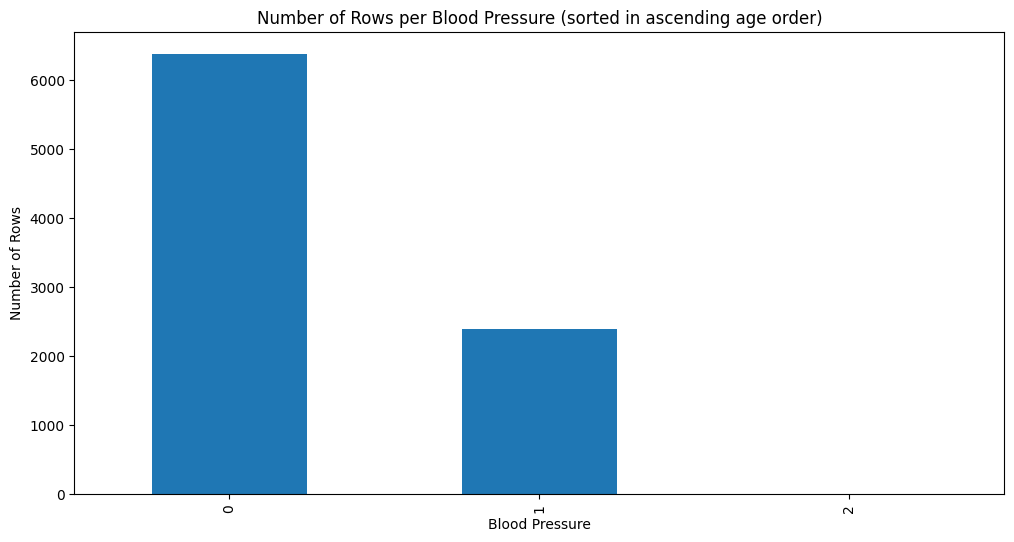

In [230]:
blood_pressure_counts = data['Blood Pressure'].value_counts()
blood_pressure_counts = blood_pressure_counts.sort_index()
plt.figure(figsize=(12, 6))
blood_pressure_counts.plot(kind='bar')
plt.xlabel('Blood Pressure')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Blood Pressure (sorted in ascending age order)')
plt.show()

#### Heart Rate column

#### Cholesterol column

#### Family History column

#### Smoking column

#### Obesity column

#### Alcohol Consumption column

#### Exercise Hours Per Week column

#### Diet column
##### Type and Senseless values

In [231]:
print(data['Diet'].dtype)
diet = data['Diet'].unique()
print(diet)

object
['Average' 'Unhealthy' 'Healthy']


In [232]:
# Make Diet numerical
diet = data['Diet'].unique()
# Create an empty dictionary to store the mapping
diet_mapping = {}

# Iterate over unique diets and assign numerical values
for i in range(len(diet)):
    diet_mapping[diet[i]] = i

# Map the 'Diet' column using the created mapping
data['Diet'] = data['Diet'].map(diet_mapping)
print(data['Diet'][:15])

0     0
1     1
2     2
3     0
4     1
5     1
6     2
7     0
8     0
9     1
10    0
11    0
12    1
13    2
14    1
Name: Diet, dtype: int64


##### Repartition

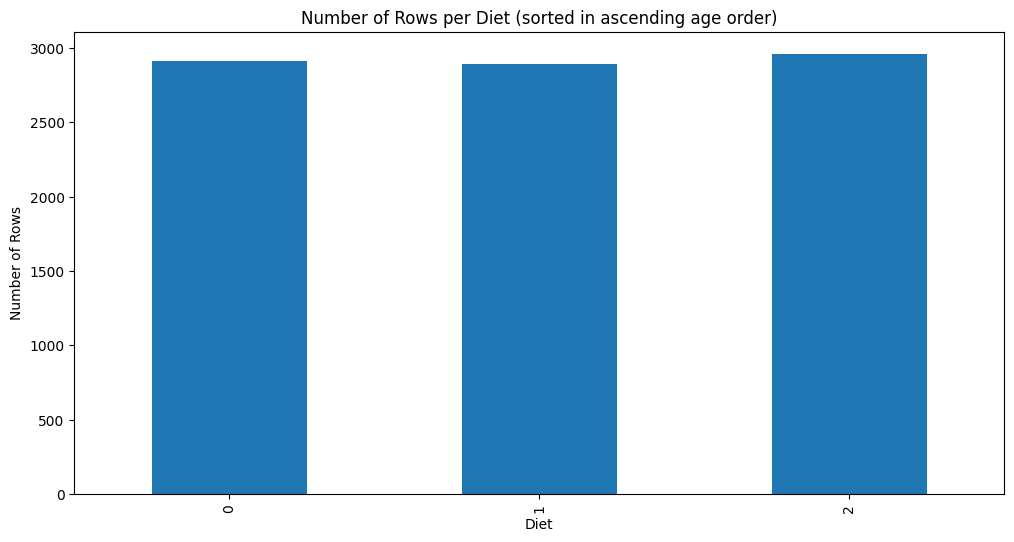

In [233]:
diet_counts = data['Diet'].value_counts()
diet_counts = diet_counts.sort_index()
plt.figure(figsize=(12, 6))
diet_counts.plot(kind='bar')
plt.xlabel('Diet')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Diet (sorted in ascending age order)')
plt.show()

**We can note that the diet column has no senseless values, since these are 3 correct values**

#### Previous Heart Problems column

#### Medication Use column

#### Stress Level column

#### Sedentary Hours Per Day column

#### Income column

#### BMI column

#### Triglycerides column

#### Physical Activity Days Per Week column

#### Sleep Hours Per Day column

#### Country column
##### Type and senseless values

In [234]:
print(data['Country'].dtype)
country = data['Country'].unique()
print(country)

object
['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam' 'China' 'Italy' 'Spain' 'India'
 'Nigeria' 'New Zealand' 'South Korea' 'Australia' 'Colombia'
 'United Kingdom']


**We can note that the country column has no senseless values, since these are 20 correct values**

In [235]:
#make Country numerical
country = data['Country'].unique()
# Create an empty dictionary to store the mapping
country_mapping = {}
# Iterate over unique countries and assign numerical values
for i in range(len(country)):
    country_mapping[country[i]] = i

# Map the 'Country' column using the created mapping
data['Country'] = data['Country'].map(country_mapping)
print(data.head())

   Age  Sex  Cholesterol  Blood Pressure  Heart Rate  Diabetes  \
0   67    0          208               0          72         0   
1   21    0          389               0          98         1   
2   21    1          324               0          72         1   
3   84    0          383               0          73         1   
4   66    0          318               1          93         1   

   Family History  Smoking  Obesity  Alcohol Consumption  ...  \
0               0        1        0                    0  ...   
1               1        1        1                    1  ...   
2               0        0        0                    0  ...   
3               1        1        0                    1  ...   
4               1        1        1                    0  ...   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                 6.615001  261404  31.251233            286   
1                 4.963459  285768  27.194973            235   
2                 9.

##### Repartition

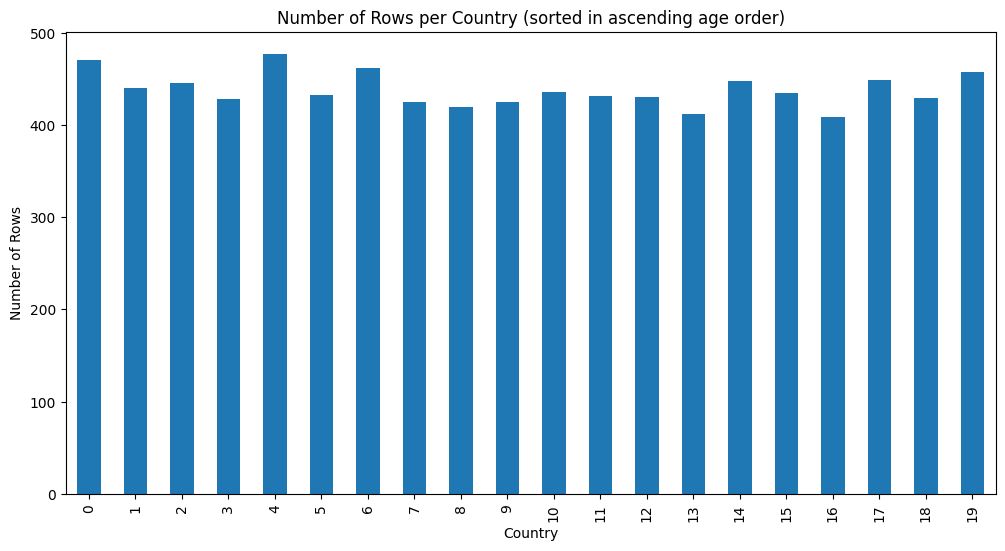

In [236]:
country_counts = data['Country'].value_counts()
country_counts = country_counts.sort_index()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Country (sorted in ascending age order)')
plt.show()

#### Continent column
##### Type and senseless values

In [237]:
print(data['Continent'].dtype)
continent = data['Continent'].unique()
print(continent)

object
['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']


**We can note that the continent column has no senseless values, since these are 6 correct values**

In [238]:
# make continent numerical
continent = data['Continent'].unique()
# Create an empty dictionary to store the mapping
continent_mapping = {}
# Iterate over unique countries and assign numerical values
for i in range(len(continent)):
    continent_mapping[continent[i]] = i

# Map the 'Continent' column using the created mapping
data['Continent'] = data['Continent'].map(continent_mapping)

##### Repartition

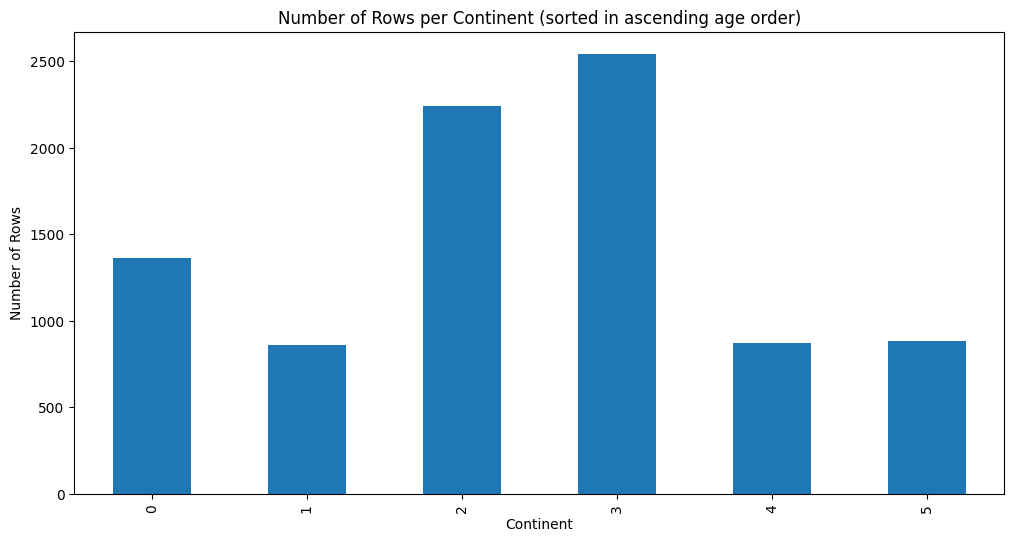

In [239]:
continent_counts = data['Continent'].value_counts()
continent_counts = continent_counts.sort_index()
plt.figure(figsize=(12, 6))
continent_counts.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Continent (sorted in ascending age order)')
plt.show()

#### Hemisphere column
##### Type and Senseless values

In [240]:
print(data['Hemisphere'].dtype)
hemisphere = data['Hemisphere'].unique()
print(hemisphere)

object
['Southern Hemisphere' 'Northern Hemisphere']


**We can note that the continent column has no senseless values, since these are 2 correct values**

In [241]:
#make hemisphere numerical
hemisphere = data['Hemisphere'].unique()
# Create an empty dictionary to store the mapping
hemisphere_mapping = {}
# Iterate over unique hemiphere and assign numerical values
for i in range(len(hemisphere)):
    hemisphere_mapping[hemisphere[i]] = i

# Map the 'Hemisphere' column using the created mapping
data['Hemisphere'] = data['Hemisphere'].map(hemisphere_mapping)

#### Diet column


##### Repartition

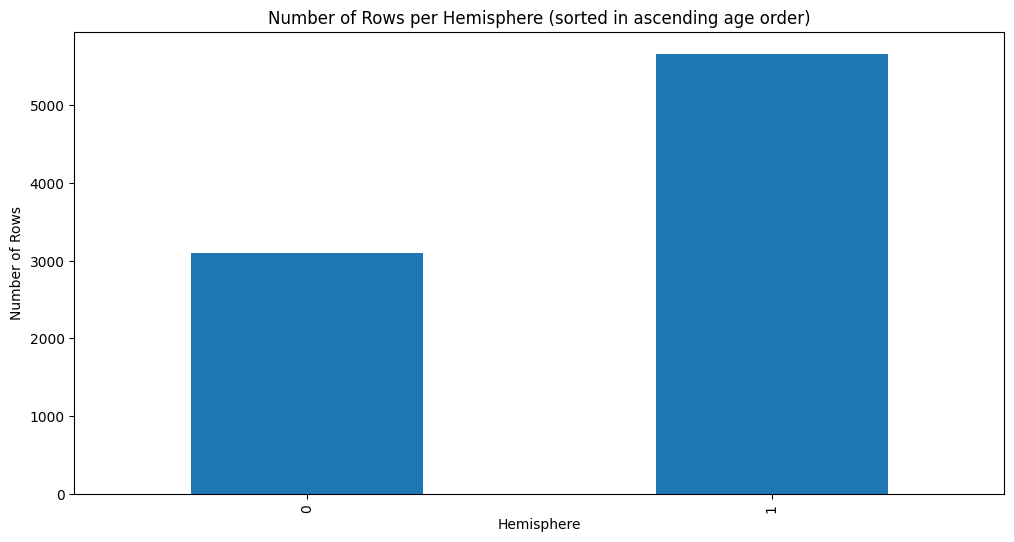

In [242]:
hemisphere_counts = data['Hemisphere'].value_counts()
hemisphere_counts = hemisphere_counts.sort_index()
plt.figure(figsize=(12, 6))
hemisphere_counts.plot(kind='bar')
plt.xlabel('Hemisphere')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Hemisphere (sorted in ascending age order)')
plt.show()

#### Heart Attack Risk column

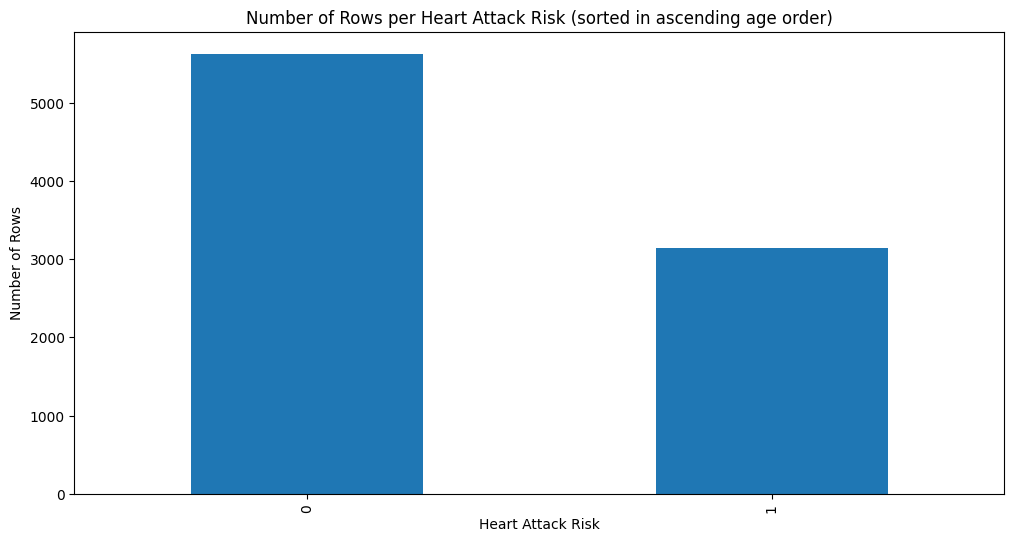

In [243]:
heart_attack_counts = data['Heart Attack Risk'].value_counts()
heart_attack_counts = heart_attack_counts.sort_index()
plt.figure(figsize=(12, 6))
heart_attack_counts.plot(kind='bar')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Heart Attack Risk (sorted in ascending age order)')
plt.show()

**The dataset is not balanced (take it into account later)**

### Verification of our dataset

In [244]:
print(data.dtypes)

Age                                  int64
Sex                                  int64
Cholesterol                          int64
Blood Pressure                       int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                              int64
Continent                            int64
Hemisphere 

                                      Age       Sex  Cholesterol  \
Age                              1.000000 -0.020067    -0.009107   
Sex                             -0.020067  1.000000    -0.007614   
Cholesterol                     -0.009107 -0.007614     1.000000   
Blood Pressure                   0.020654 -0.008021    -0.005563   
Heart Rate                      -0.003844  0.010921     0.000315   
Diabetes                        -0.014105 -0.003582    -0.013428   
Family History                   0.008353 -0.002180    -0.021608   
Smoking                          0.394891 -0.514837     0.016342   
Obesity                         -0.008140 -0.002376    -0.014843   
Alcohol Consumption             -0.006666 -0.002085    -0.007261   
Exercise Hours Per Week          0.001206  0.006976     0.021517   
Diet                            -0.011114  0.002268    -0.007185   
Previous Heart Problems          0.000868 -0.001964    -0.006070   
Medication Use                   0.000980  0.007

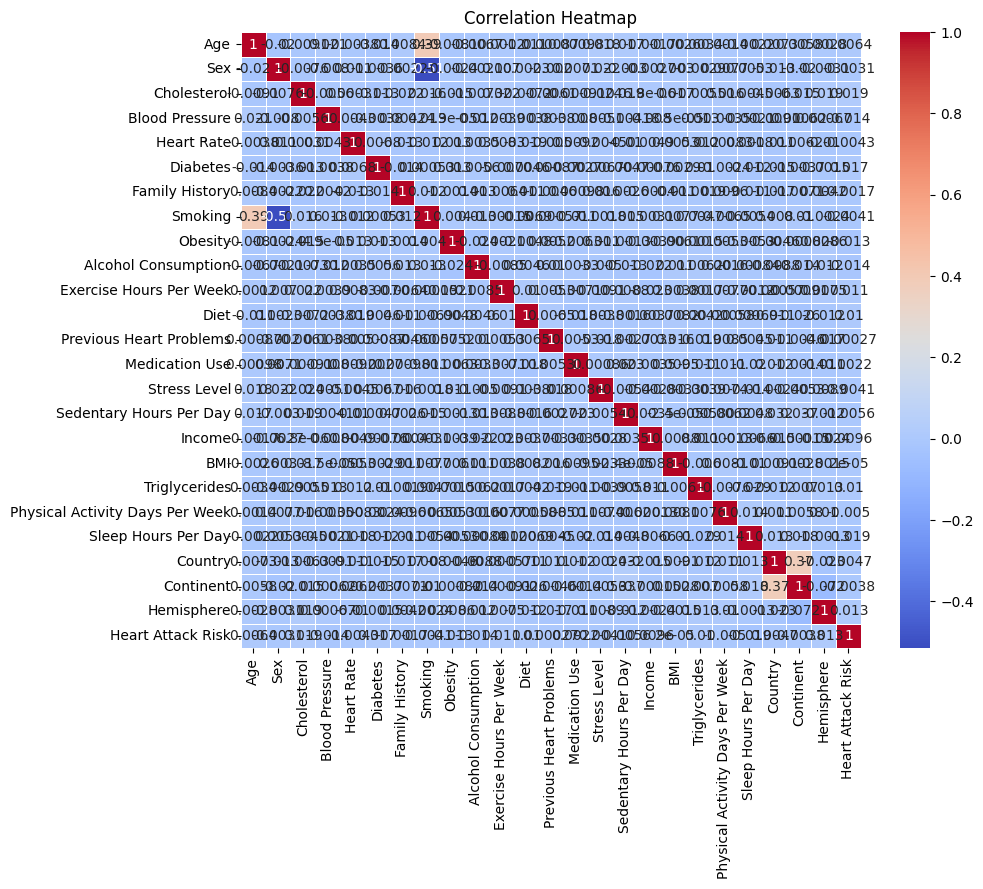

In [245]:
# Correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()